In [332]:
import pandas as pd
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import pandas as pd
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

# EDA

In [333]:
df = pd.read_csv("./data/INFLUD24-03-02-2025.csv", sep=";", encoding="latin1", low_memory=False)

In [334]:
sinais_sintomas = [
    "FEBRE", "TOSSE", "GARGANTA", "DISPNEIA", "DESC_RESP", 
    "SATURACAO", "DIARREIA", "VOMITO", "DOR_ABD", "FADIGA", 
    "PERD_OLFT", "PERD_PALA", "OUTRO_SIN", 
    #"OUTRO_DES" #DADOS FALTANTES
]
fatores_risco = [
    #"FATOR_RISC", #CORRELAÇÃO FORTE COM TODOS OS OUTROS FATORES DE RISCO!
    #"PUERPERA",  #DADOS FALTANTES
    "CARDIOPATI", 
    #"HEMATOLOGI",  #DADOS FALTANTES
    #"SIND_DOWN",  #DADOS FALTANTES
    #"HEPATICA",  #DADOS FALTANTES
    "ASMA", 
    "DIABETES", 
    "NEUROLOGIC", 
    "PNEUMOPATI", 
    "IMUNODEPRE", 
    #"RENAL",  #DADOS FALTANTES
    #"OBESIDADE", #DADOS FALTANTES
    #"OBES_IMC",  #DADOS FALTANTES
    "OUT_MORBI", 
    #"MORB_DESC" #DADOS FALTANTES
]
vacinacao = [
    "VACINA_COV", 
    #"DOSE_1_COV",  #DADOS NÃO SELECIONADOS
    #"DOSE_2_COV",   #DADOS NÃO SELECIONADOS
    #"DOSE_REF",   #DADOS NÃO SELECIONADOS
    #"DOSE_2REF",   #DADOS NÃO SELECIONADOS
    #"FAB_COV1",   #DADOS NÃO SELECIONADOS
    #"FAB_COV2",   #DADOS NÃO SELECIONADOS
    #"FAB_COVRF",   #DADOS NÃO SELECIONADOS
    #"FAB_COVRF2",   #DADOS NÃO SELECIONADOS
    #"LOTE_1_COV",   #DADOS NÃO SELECIONADOS
    #"LOTE_2_COV",   #DADOS NÃO SELECIONADOS
    #"LOTE_REF",   #DADOS NÃO SELECIONADOS
    # "LOTE_REF2",   #DADOS NÃO SELECIONADOS
    #"FNT_IN_COV"  #DADOS NÃO SELECIONADOS
]
tratamento = [
    "ANTIVIRAL", 
    #"TP_ANTIVIR", "OUT_ANTIV", "DT_ANTIVIR",  #DADOS NÃO SELECIONADOS
    #"TRAV_COV",  #DADOS NÃO SELECIONADOS
    #"TIPO_TRAV",  #DADOS NÃO SELECIONADOS
    #"OUT_TRAV",  #DADOS NÃO SELECIONADOS
    #"DT_TRAV_COV" #DADOS NÃO SELECIONADOS
]

internacao = [
    "HOSPITAL", 
    #"DT_INTERNA",  #DADOS NÃO SELECIONADOS
    #"SG_UF_INTE",  #DADOS NÃO SELECIONADOS
    #"CO_MU_INTE",  #DADOS NÃO SELECIONADOS
    #"CO_UN_INTE",  #DADOS NÃO SELECIONADOS
    "UTI", 
    #"DT_ENTUTI",  #DADOS NÃO SELECIONADOS
    #"DT_SAIDUTI",  #DADOS NÃO SELECIONADOS
    "SUPORT_VEN"
]
exames = [
    "RAIOX_RES", 
    #"RAIOX_OUT",  #DADOS FALTANTES
    #"DT_RAIOX",  #DADOS NÃO SELECIONADOS
    "TOMO_RES", 
   # "TOMO_OUT",  #DADOS FALTANTES
    #"DT_TOMO",  #DADOS NÃO SELECIONADOS
    "AMOSTRA", 
    #"DT_COLETA",  #DADOS NÃO SELECIONADOS
    "TP_AMOSTRA", 
    #"OUT_AMOST"
]
testes_laboratoriais = [
    "RES_AN", 
    #"POS_AN_FLU",   #DADOS NÃO SELECIONADOS
    #"TP_FLU_AN",   #DADOS NÃO SELECIONADOS
    #"POS_AN_OUT",   #DADOS NÃO SELECIONADOS
    #"AN_SARS2",   #DADOS NÃO SELECIONADOS
    #"AN_VSR",   #DADOS NÃO SELECIONADOS
    #"AN_PARA1",   #DADOS NÃO SELECIONADOS
    #"AN_PARA2",   #DADOS NÃO SELECIONADOS
    #"AN_PARA3",   #DADOS NÃO SELECIONADOS
    #"AN_ADENO",   #DADOS NÃO SELECIONADOS
    #"AN_OUTRO",   #DADOS NÃO SELECIONADOS
    #"DS_AN_OUT"  #DADOS NÃO SELECIONADOS
]
rt_pcr = [
    "PCR_RESUL", 
    #"DT_PCR",   #DADOS NÃO SELECIONADOS
    "POS_PCRFLU", 
    #"TP_FLU_PCR",   #DADOS NÃO SELECIONADOS
    #"PCR_FLUASU",   #DADOS NÃO SELECIONADOS
    #"FLUASU_OUT",   #DADOS NÃO SELECIONADOS
    #"PCR_FLUBLI",   #DADOS NÃO SELECIONADOS
    #"FLUBLI_OUT",   #DADOS NÃO SELECIONADOS
    "POS_PCROUT",
    #"PCR_SARS2",   #DADOS NÃO SELECIONADOS
    #"PCR_VSR",   #DADOS NÃO SELECIONADOS
    #"PCR_PARA1",   #DADOS NÃO SELECIONADOS
    #"PCR_PARA2",   #DADOS NÃO SELECIONADOS
    #"PCR_PARA3",   #DADOS NÃO SELECIONADOS
    #"PCR_PARA4",   #DADOS NÃO SELECIONADOS
    #"PCR_ADENO",   #DADOS NÃO SELECIONADOS
    #"PCR_METAP",   #DADOS NÃO SELECIONADOS
    #"PCR_BOCA",   #DADOS NÃO SELECIONADOS
    #"PCR_RINO",   #DADOS NÃO SELECIONADOS
    #"PCR_OUTRO",   #DADOS NÃO SELECIONADOS
    #"DS_PCR_OUT"  #DADOS NÃO SELECIONADOS
]


In [335]:
columns = (sinais_sintomas 
            + fatores_risco 
            + vacinacao 
            + tratamento 
            + internacao
            + exames
            + testes_laboratoriais
            + rt_pcr)
target = "CASO_SRAG"

In [336]:
df = df[columns + ["CASO_SRAG"]]

In [337]:
is_null = df.isnull().sum()
remove_features = is_null[is_null / len(df) > 0.70].index.tolist()
df = df[df.columns.drop(remove_features)]

In [338]:
(df.isnull().sum() / len(df)).sort_values(ascending=False)

IMUNODEPRE    0.695856
NEUROLOGIC    0.691754
PNEUMOPATI    0.691476
ASMA          0.687209
POS_PCRFLU    0.685441
DIABETES      0.676996
POS_PCROUT    0.670232
OUT_MORBI     0.666411
CARDIOPATI    0.658409
TOMO_RES      0.413032
RAIOX_RES     0.311369
OUTRO_SIN     0.273663
PERD_PALA     0.259017
PERD_OLFT     0.257681
DOR_ABD       0.249405
GARGANTA      0.242386
DIARREIA      0.240408
VOMITO        0.233641
FADIGA        0.233330
ANTIVIRAL     0.191679
SATURACAO     0.150790
DESC_RESP     0.119487
DISPNEIA      0.110783
SUPORT_VEN    0.109432
CASO_SRAG     0.109151
FEBRE         0.105394
RES_AN        0.102488
UTI           0.100743
PCR_RESUL     0.078279
TP_AMOSTRA    0.075052
TOSSE         0.065053
HOSPITAL      0.022456
AMOSTRA       0.020666
VACINA_COV    0.000191
dtype: float64

In [339]:
def corr_heatmap(df, width=1600, height=1600, fig_type=None):
    """   
    Generate a correlation heatmap for the DataFrame.
    """
    fig = px.imshow(df.corr(numeric_only=True), text_auto=True, aspect="equal", color_continuous_scale='RdBu_r', title='Heatmap of Correlation Coefficients')
    fig.update_layout(width=width, height=height)
    return fig.show(fig_type)

# Preprocessing

In [ ]:
df = df.fillna(9).astype(int)
df = df.replace({9: -1})
df = pd.get_dummies(df, columns=df.columns.drop("CASO_SRAG"), drop_first=True).astype(int)
df = df[(df["CASO_SRAG"] > -1)]

#Prevenindo Dummy Variable Trap!
features_out = ["FEBRE_2", "TOSSE_2", "DISPNEIA_2", "DESC_RESP_2", "SATURACAO_2",  # corr < -0.70 com TOSSE_1!
                'NEUROLOGIC_2', 'IMUNODEPRE_2', # corr < -0.70 com FATOR_RISC_2!
                "HOSPITAL_2",  # corr < -0.70 com HOSPITAL_1!
                "UTI_2", #corr < -0.70 com UTI_2!
                "OUTRO_SIN_2", #corr < -0.70 COM OUTRO_SIN_1
                "FADIGA_2", #corr < -0.70 COM FADIGA_1
                "VOMITO_2", #corr < -0.70 com VOMITO_1
                "DOR_ABD_2", #corr < -0.70 com DOR_ABD_1
                "DIARREIA_2" , #corr < -0.70 com DIARREIA_1
                "GARGANTA_2", #corr < -0.70 com GARGANTA_1
                "SUPORT_VEN_3", #corr < -0.70 com SUPORT_VEN_2
                "PERD_OLFT_2", #corr < -0.50 com PERDA_OLF_1
                "ASMA_2" #corr < -0.60 com ASMA_1
                ]
df = df[df.columns.drop(features_out)]

In [341]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

## Partialling-Out / Residualization (FWL Theorem)

In [342]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import check_array
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureResidualizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        """Feature transformer that reduces multicollinearity by residualizing highly correlated features.
    
        For each feature strongly correlated (above `corrcoef` threshold) with others, this class:
        1. Fits a linear regression model using the correlated features as predictors.
        2. Replaces the original feature with residuals (observed - predicted) from the model,
        effectively removing linear dependencies.
        
        Useful as a preprocessing step for linear models where multicollinearity is problematic.
        
        Attributes
        ----------
        models_ : Dict[int, Dict[str, Any]]
            Dictionary storing residualization models for each processed feature.
            Keys are feature indices; values are dicts with:
            - "model": Fitted `LinearRegression` object.
            - "features": Indices of features used as predictors.
        feature_names_in_ : Optional[np.ndarray]
            Names of input features if provided in a pandas DataFrame.
        n_features_in_ : Optional[int]
            Number of features seen during fit.

        Notes
        -----
        - Computes absolute Pearson correlations between all feature pairs (ignoring self-correlations)  
        - Processes features in descending order of total correlation with others  
        - For each target feature:  
          - Selects correlated predictors (≥ threshold) not yet residualized  
          - Fits linear model: target ~ predictors  
          - Replaces target feature with model residuals  
          - Excludes residualized features from future predictor sets  
        - Preserves:  
          - Feature order and non-correlated features  
          - Non-linear relationships  
        - Prevents circular dependencies by marking residualized features  
        - Only removes linear relationships between features  

        """
        self.models_ = None
        self.feature_names_in_ = None
        self.n_features_in_ = None

    def fit(self, X: np.ndarray, corrcoef: float = 0.8, processing_order=None):
        """
        Identify feature pairs with absolute correlation ≥ `corrcoef` and prepare residualization models.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Input data. Can be a pandas DataFrame (preserves column names) or numpy array.
        corrcoef : float, default=0.8
            Absolute correlation threshold for triggering residualization.
            Features with |ρ| ≥ this value will be residualized.
            
        Returns
        -------
        self : FeatureResidualizer
            Fitted transformer.
        """

        self.models_ = {}
        self.feature_names_in_ = getattr(X, 'columns', None)
        X = check_array(X, ensure_2d=True, dtype=np.float64)
        self.n_features_in_ = X.shape[1]
        
        corr = np.abs(np.corrcoef(X, rowvar=False))
        np.fill_diagonal(corr, 0)
        residualized = []
        
        processing_order = np.argsort(-np.sum(corr, axis=1))
        
        for i in processing_order:
            corr_feature = corr[i]
            mask = np.ones(corr_feature.shape, dtype=bool)
            mask[residualized] = False
            indexes = np.argwhere((corr_feature >= corrcoef) & mask).flatten()

            if len(indexes) > 0:
                model = LinearRegression()
                model.fit(X[:, indexes], X[:, i])
  
                self.models_[i] = {"model": model,
                                "features": indexes,
                            }
                residualized.append(i)
        
        return self
    
    def transform(self, X: np.ndarray) -> np.ndarray:
        """
        Apply residualization to the input data using pre-trained models.
        
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Data to transform. Must match feature count of `fit()` input.
            
        Returns
        -------
        X_transformed : ndarray of shape (n_samples, n_features)
            Data with residualized features (others remain unchanged).
            
        Raises
        ------
        ValueError
            If number of features in X doesn't match training data.
        """
        
        check_is_fitted(self, 'models_')
        X = check_array(X, ensure_2d=True, dtype=np.float64)
        X = X.copy()
        
        if X.shape[1] != self.n_features_in_:
            raise ValueError(
                f"Expected {self.n_features_in_} features, got {X.shape[1]}"
            )
        
        for i, model_info in self.models_.items():
            model_info = self.models_[i]
            X[:, i] -= model_info["model"].predict(X[:, model_info["features"]])
            
        return X
    
    def fit_transform(self, X: np.ndarray, corrcoef: float = 0.8) -> np.ndarray:
        """Convenience method for fit().transform()."""
        return self.fit(X, corrcoef=corrcoef).transform(X)

In [343]:
dummy_sintomas = []
for sintoma in sinais_sintomas:
    dummy = df.columns[df.columns.str.startswith(sintoma)]
    dummy_sintomas = dummy_sintomas + dummy.tolist()
dummy_fatores_risco = []
for fator in fatores_risco:
    dummy = df.columns[df.columns.str.startswith(fator)]
    dummy_fatores_risco = dummy_fatores_risco + dummy.tolist()

dummy_internacao = []
for inter in internacao:
    dummy = df.columns[df.columns.str.startswith(inter)]
    dummy_internacao = dummy_internacao + dummy.tolist()


In [344]:
y_train = df_train["CASO_SRAG"]
y_test = df_test["CASO_SRAG"]
X_train = df_train[df_train.columns[df_train.columns != target]]
X_test = df_test[df_test.columns[df_test.columns != target]]

### Residualizar Sinais e Sintomas

In [345]:
residualizer = FeatureResidualizer()
residualizer.fit(df_train[dummy_sintomas], corrcoef=0.70)

FeatureResidualizer()

In [346]:
#Train
X_train = X_train.astype({x: float for x in dummy_sintomas})
X_train.loc[:, dummy_sintomas] = residualizer.transform(X_train[dummy_sintomas])

#Test
X_test = X_test.astype({x: float for x in dummy_sintomas})
X_test.loc[:, dummy_sintomas] = residualizer.transform(X_test[dummy_sintomas])

### Residualizar Fatores de Risco

In [347]:
residualizer = FeatureResidualizer()
residualizer.fit(df_train[dummy_fatores_risco], corrcoef=0.70)

FeatureResidualizer()

In [348]:
#Train
X_train = X_train.astype({x: float for x in dummy_fatores_risco})
X_train.loc[:, dummy_fatores_risco] = residualizer.transform(X_train[dummy_fatores_risco])

#Test
X_test = X_test.astype({x: float for x in dummy_fatores_risco})
X_test.loc[:, dummy_fatores_risco] = residualizer.transform(X_test[dummy_fatores_risco])

### Residualizar Internação

In [349]:
residualizer = FeatureResidualizer()
residualizer.fit(df_train[dummy_internacao], corrcoef=0.70)

FeatureResidualizer()

In [350]:
#Train
X_train = X_train.astype({x: float for x in dummy_internacao})
X_train.loc[:, dummy_internacao] = residualizer.transform(X_train[dummy_internacao])

#Test
X_test = X_test.astype({x: float for x in dummy_internacao})
X_test.loc[:, dummy_internacao] = residualizer.transform(X_test[dummy_internacao])

### Sinais e Sintomas

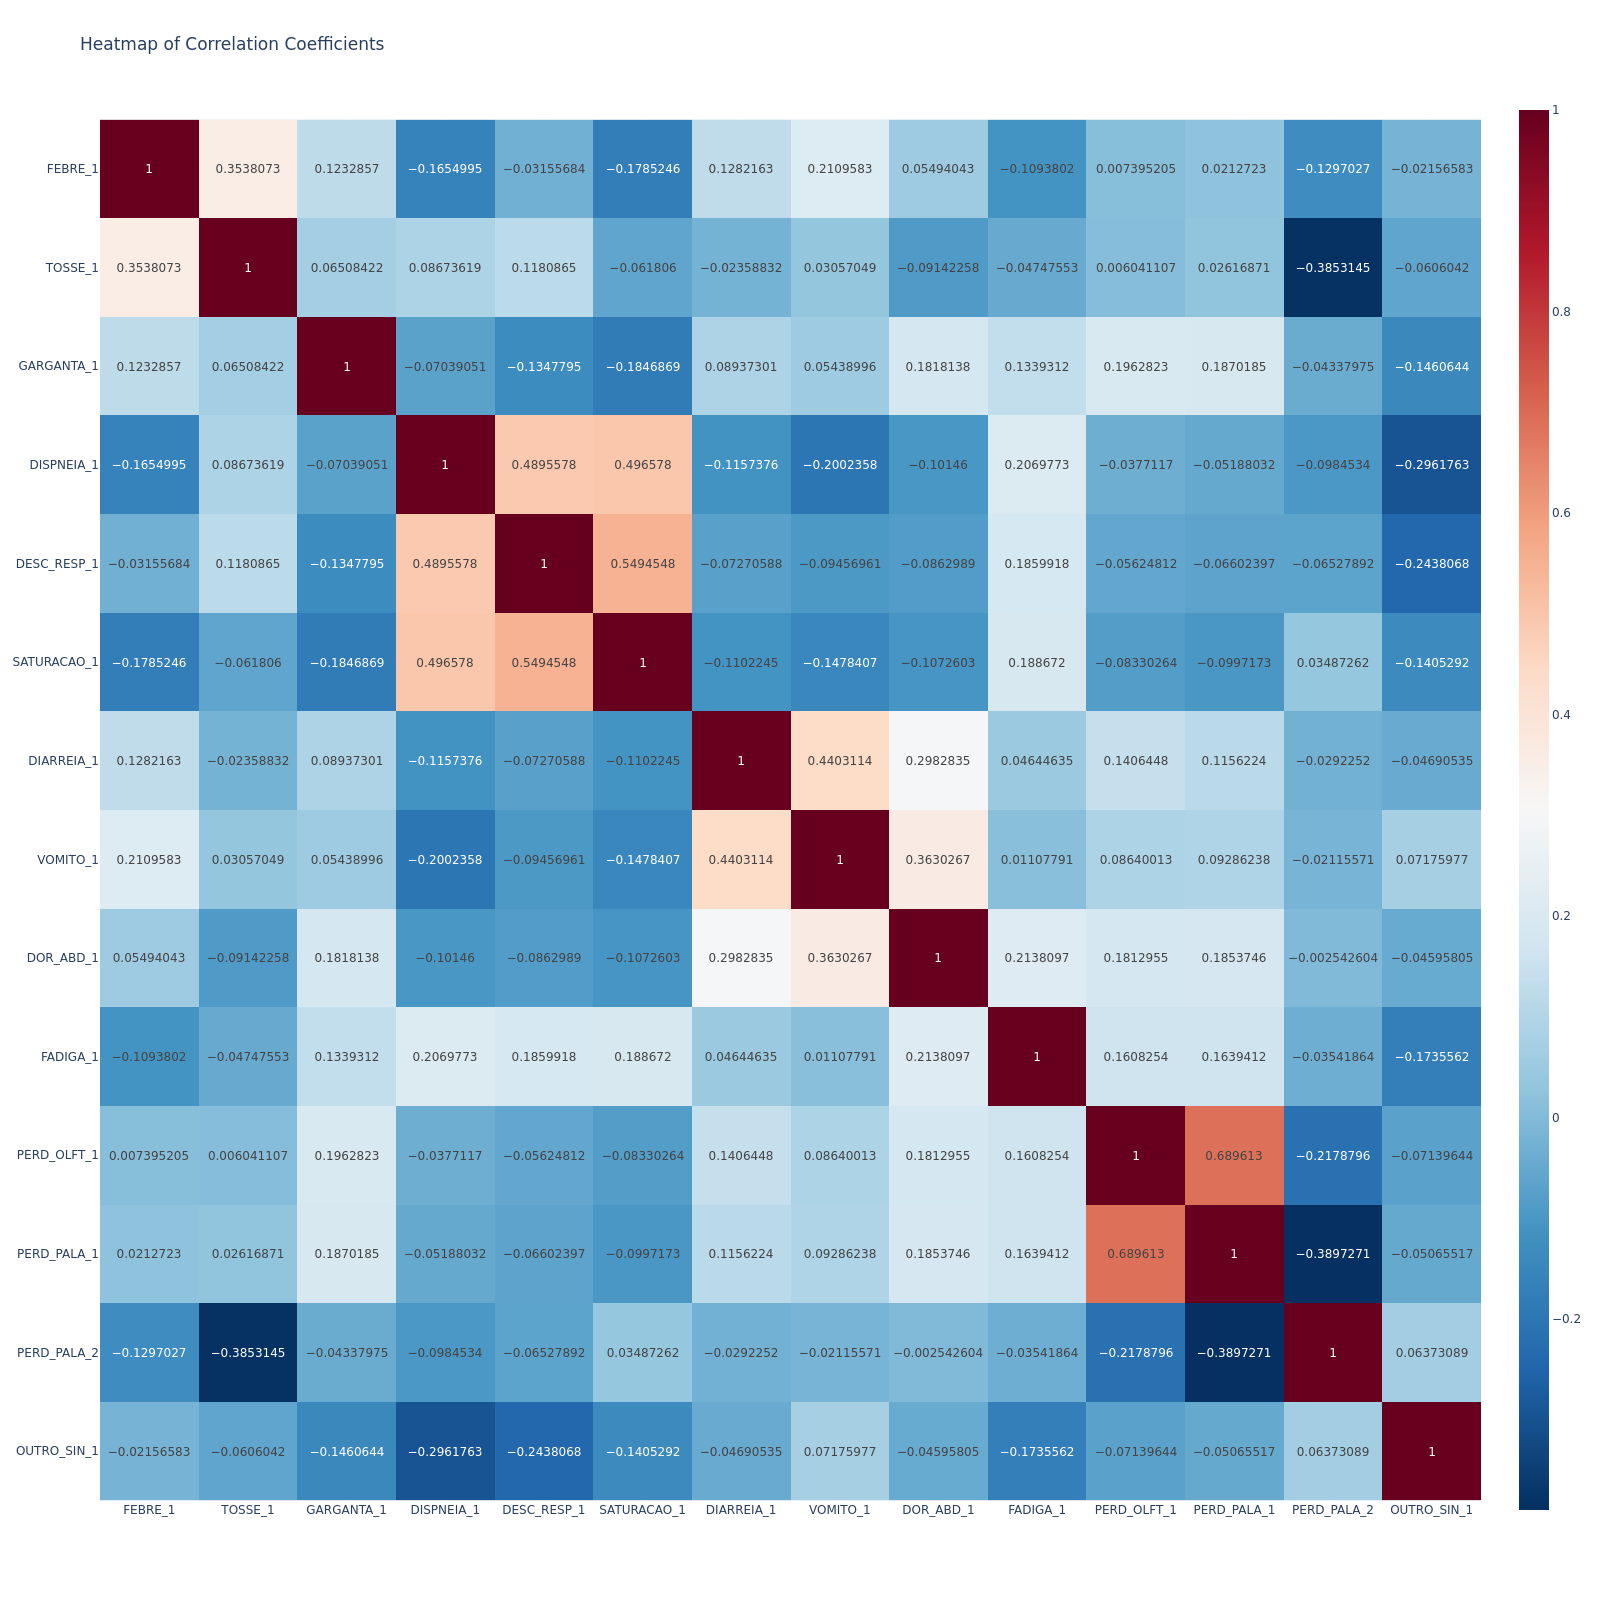

In [351]:
corr_heatmap(X_train.corr(numeric_only=True)[dummy_sintomas], fig_type="png")

### Fatores de Risco

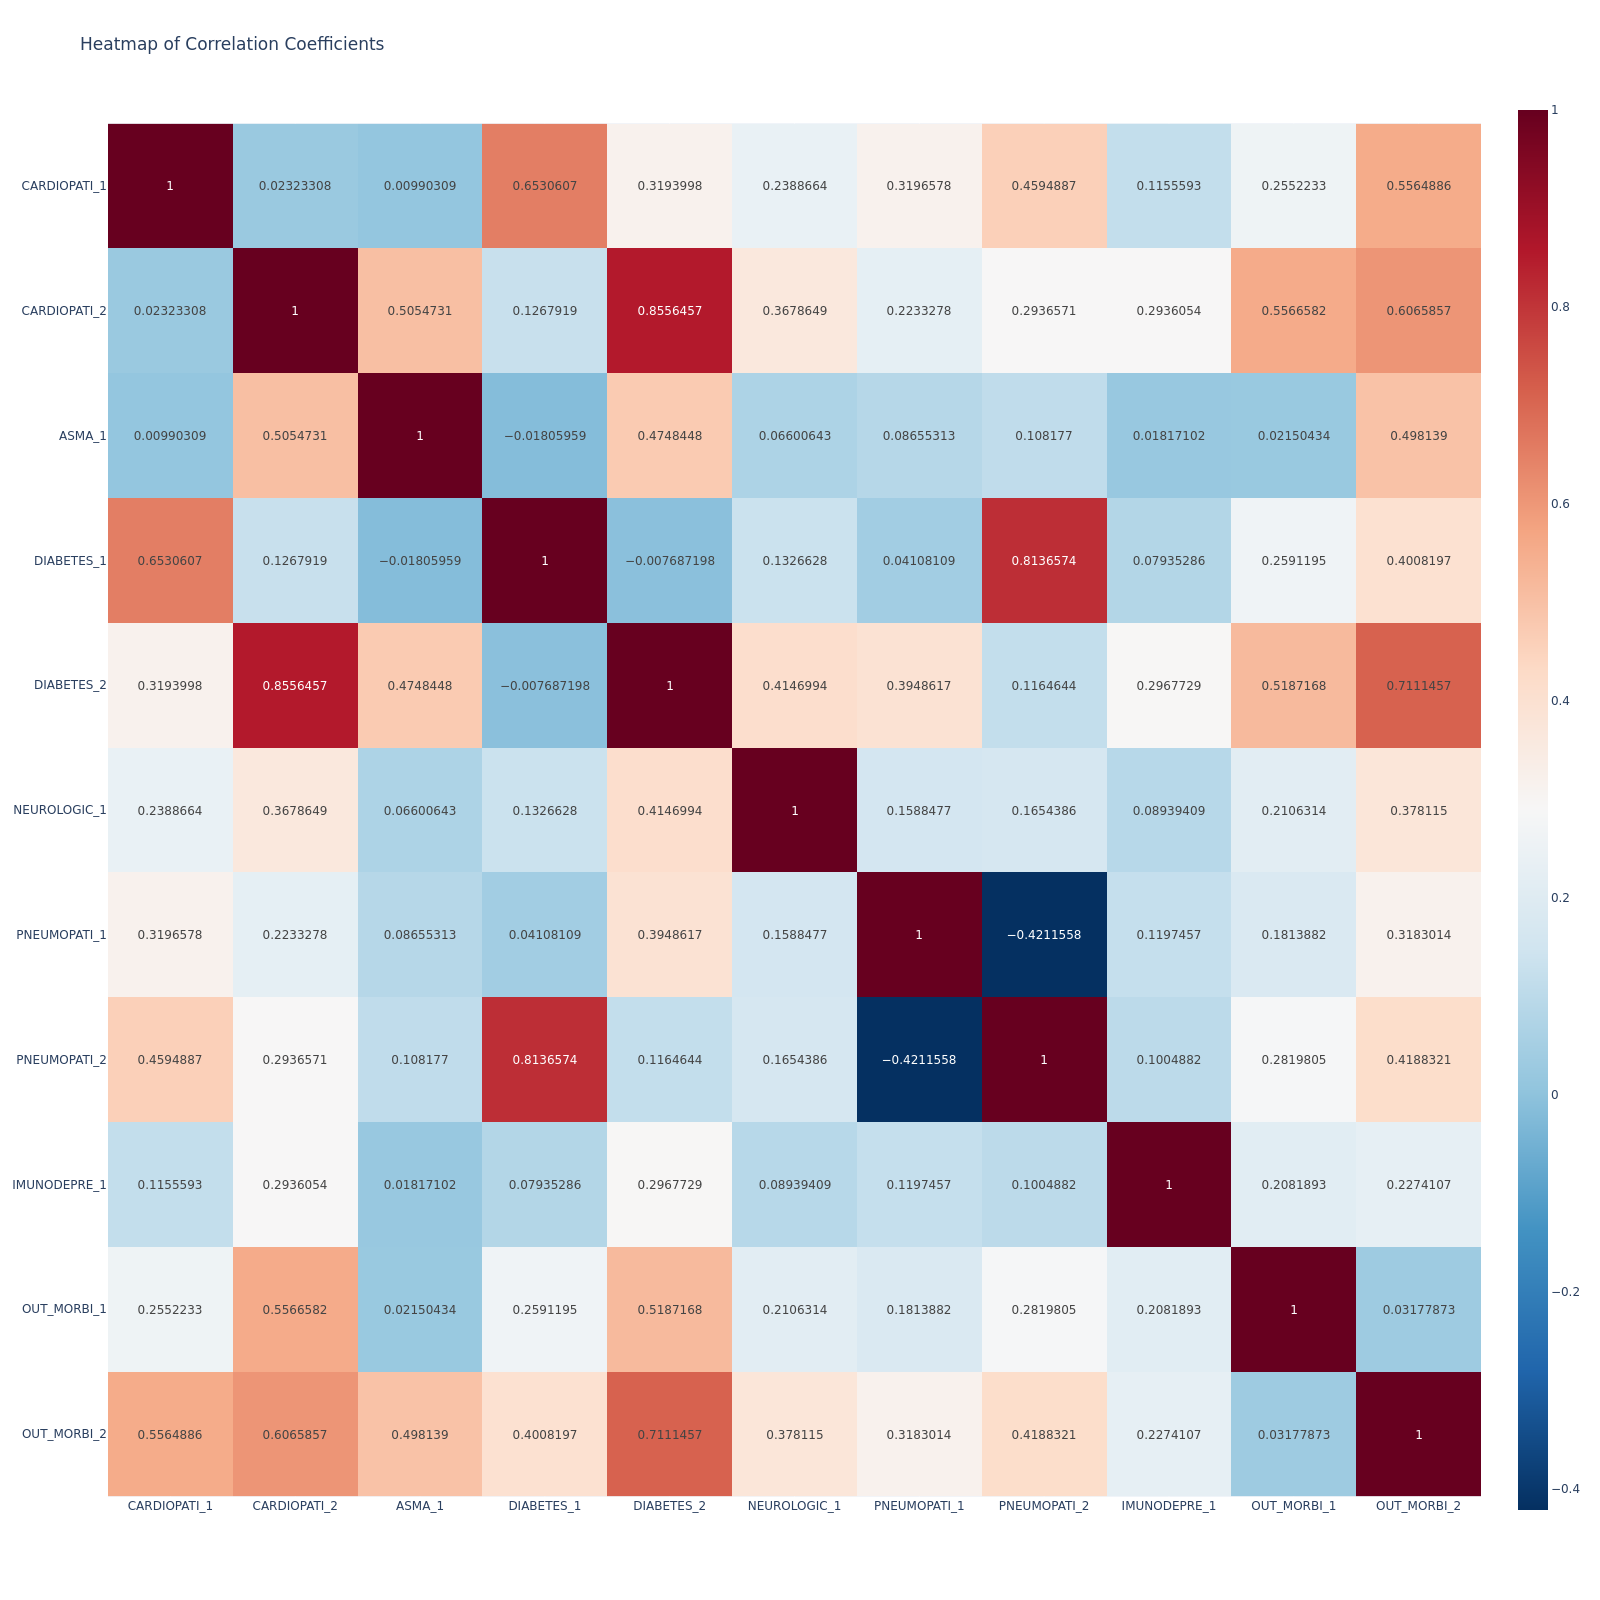

In [352]:
corr_heatmap(X_train.corr(numeric_only=True)[dummy_fatores_risco], fig_type="png")

### Internação

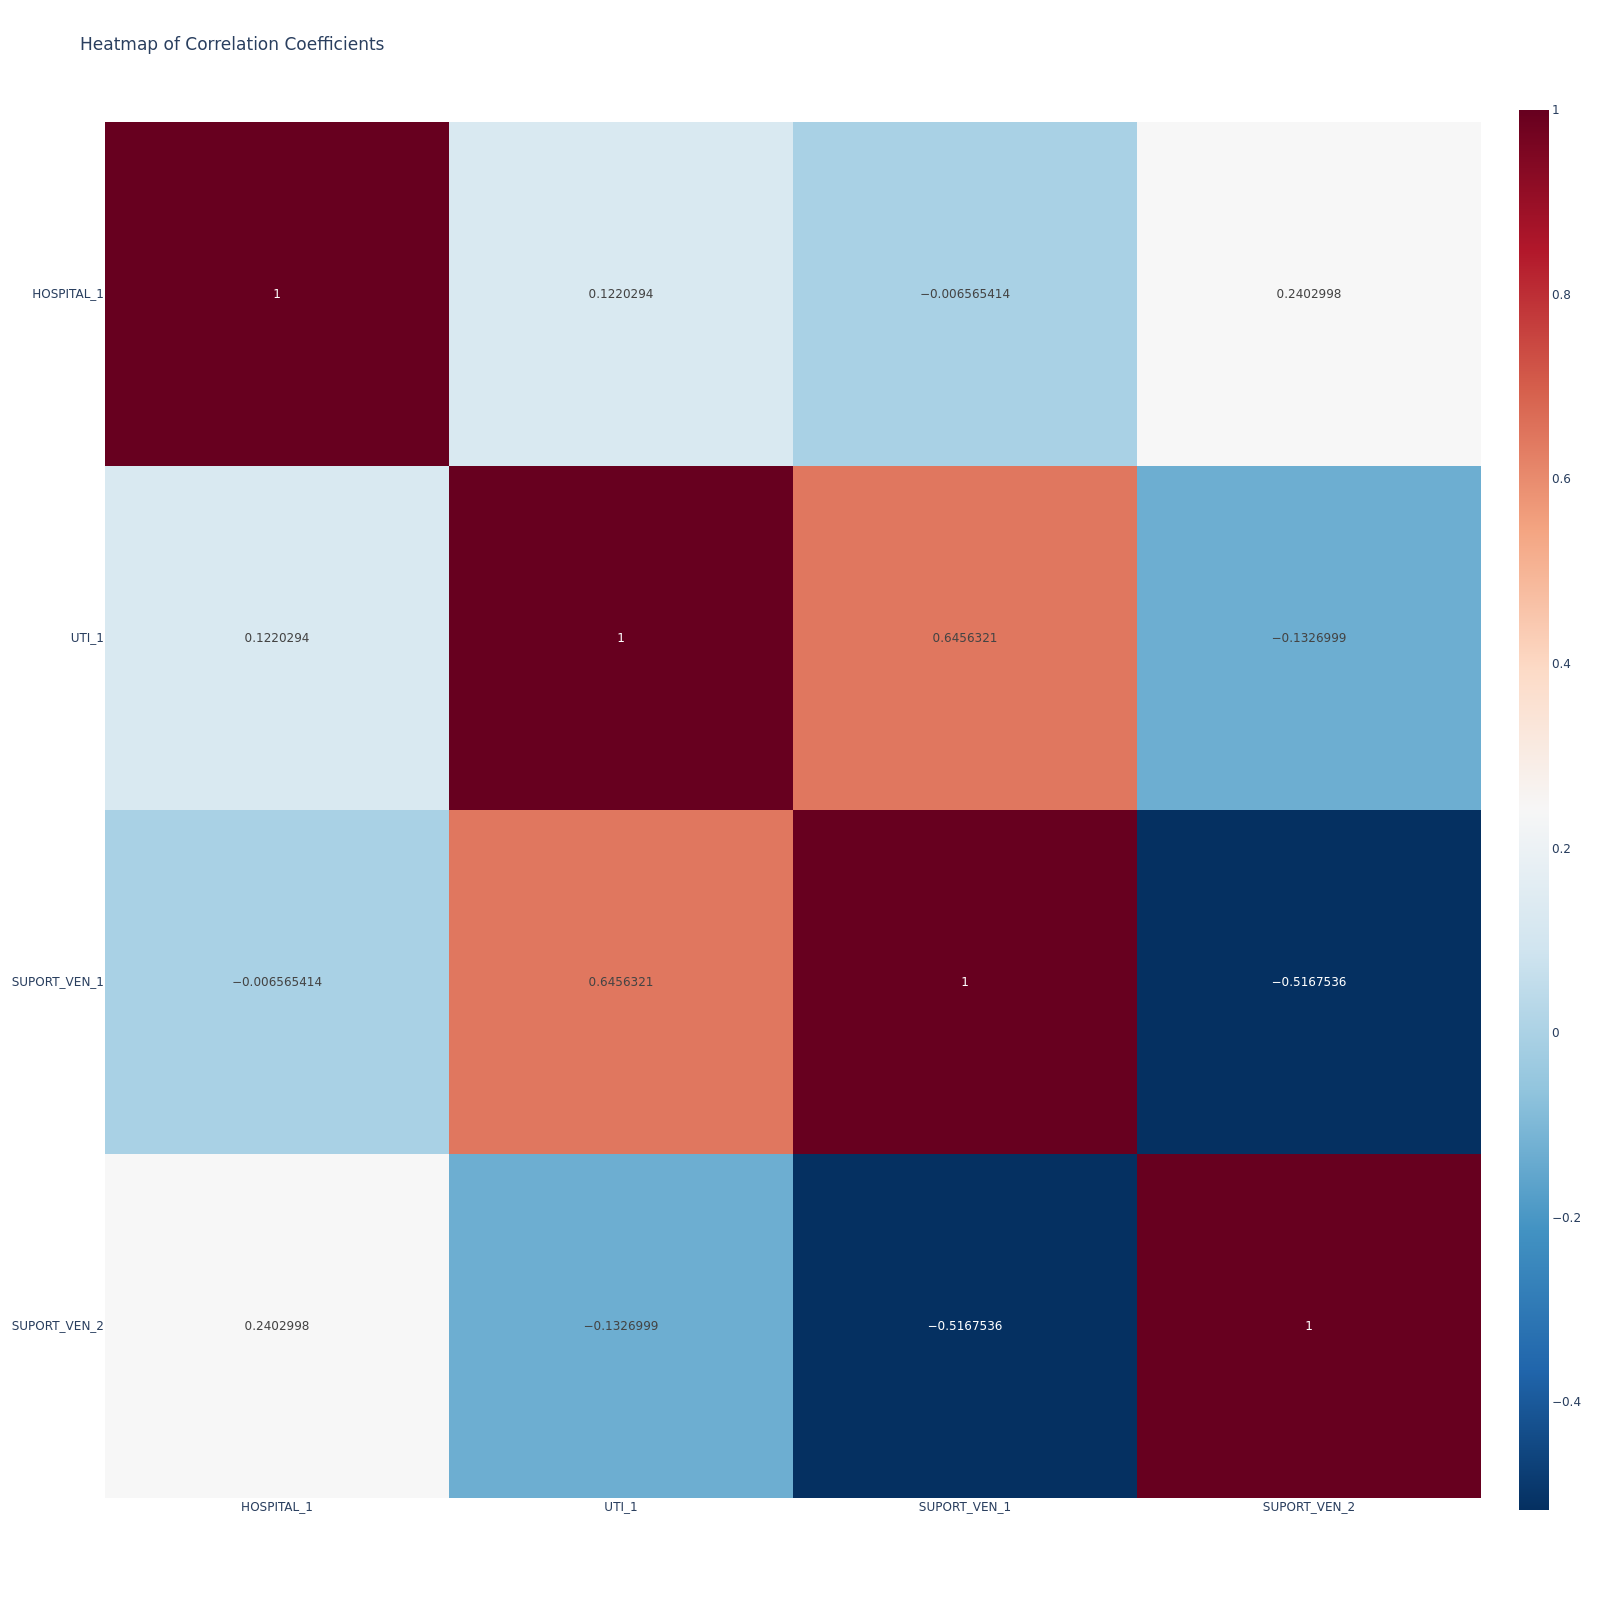

In [353]:
corr_heatmap(X_train.corr(numeric_only=True)[dummy_internacao], fig_type="png")

### Heatmap

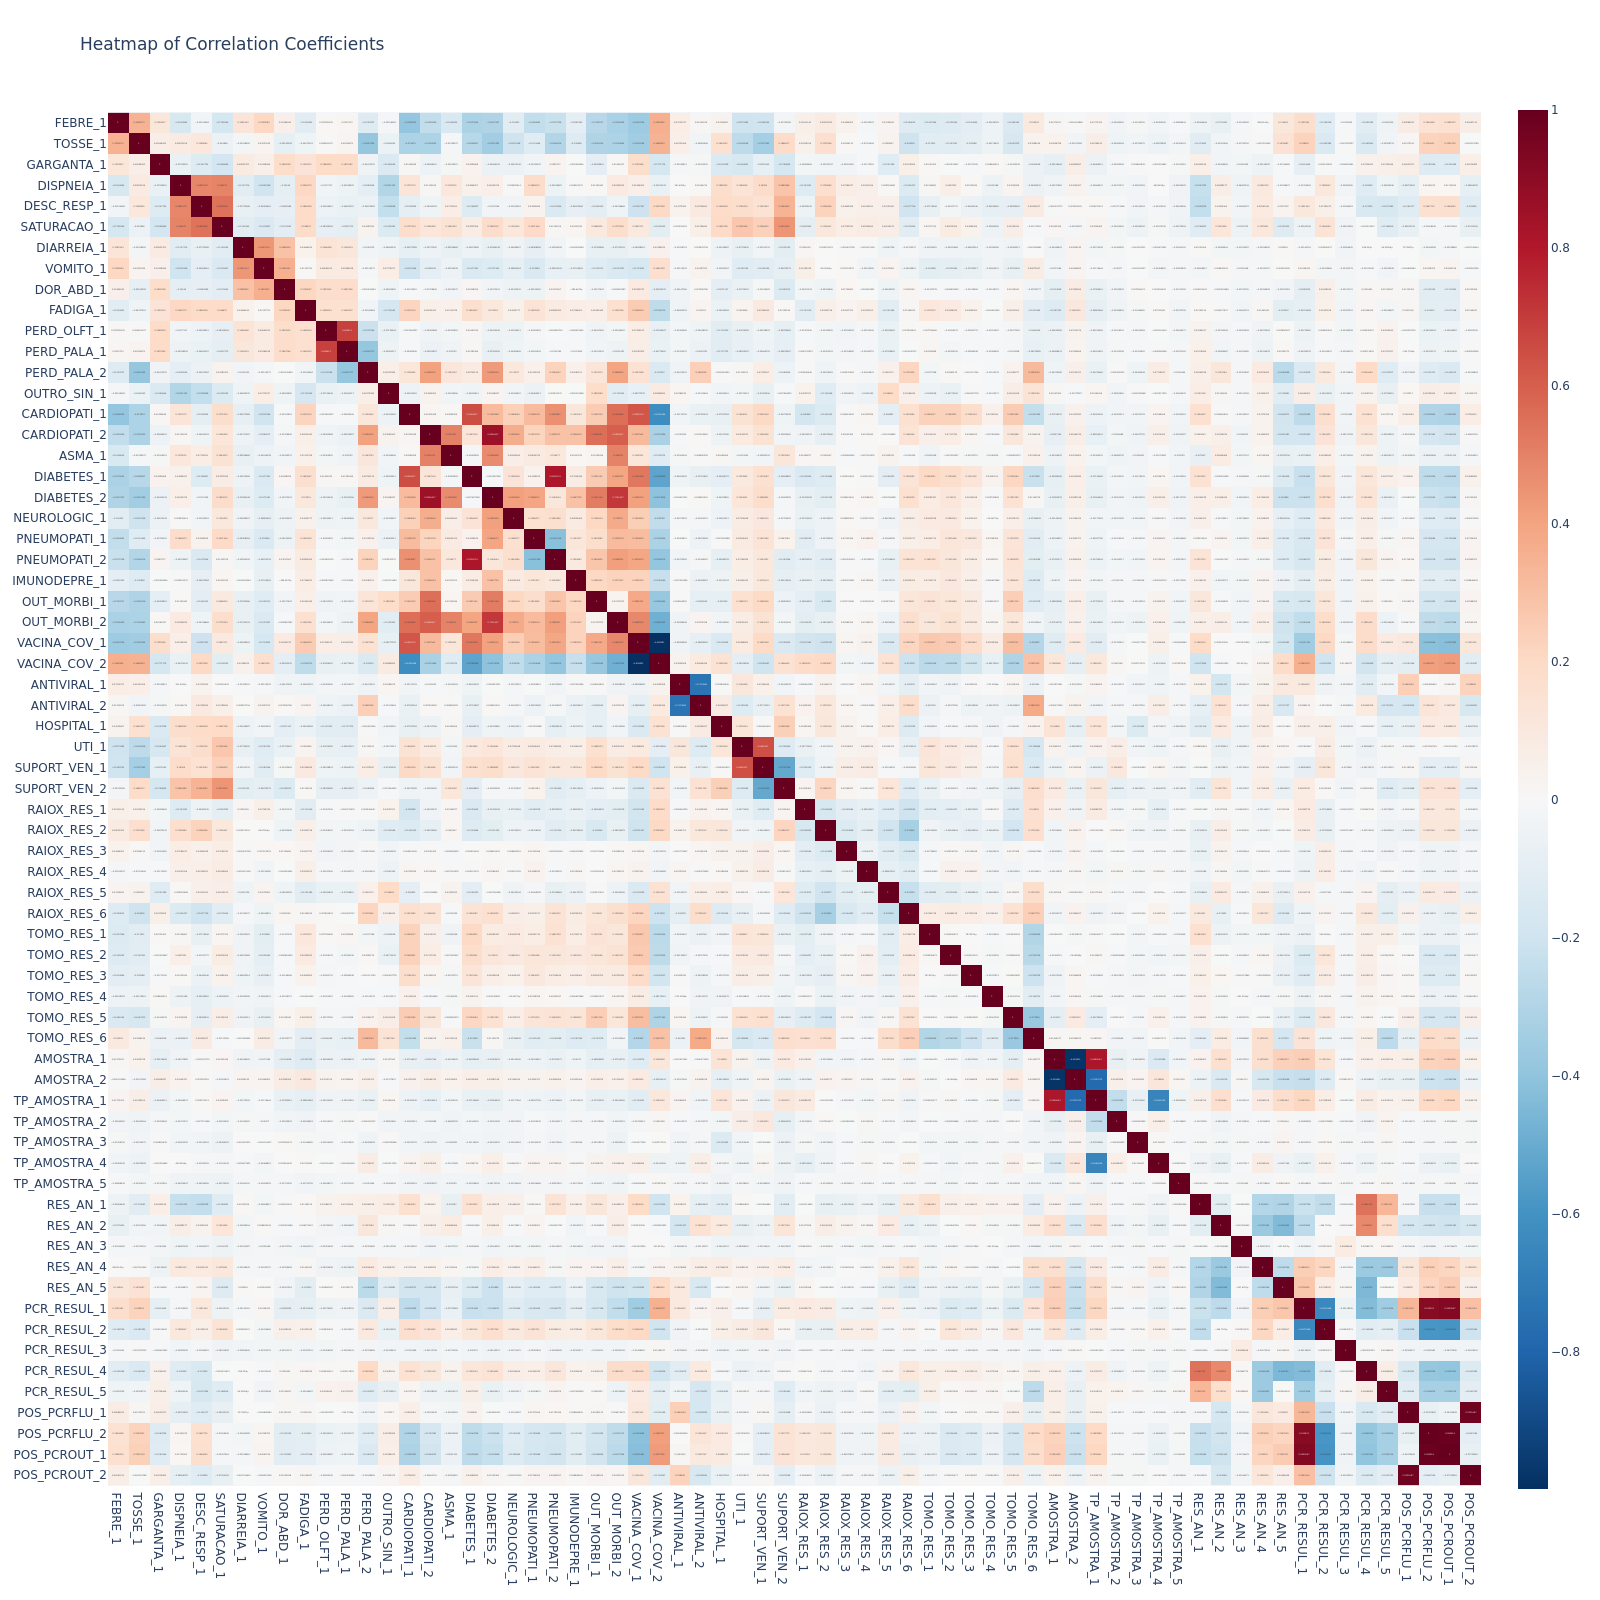

In [354]:
corr_heatmap(X_train.corr(numeric_only=True), fig_type="png")

In [355]:
def filtering_features_based_on_vif(X: np.ndarray, threshold=15.0, verbose=False):
    """
    Filter features based on Variance Inflation Factor (VIF).
    Features with VIF above the threshold are removed iteratively."""

    if not isinstance(threshold, (int, float)):
        raise ValueError("Threshold must be a numeric value.")
    if not isinstance(verbose, bool):
        raise ValueError("Verbose must be a boolean value.")
    if X.size == 0:
        raise ValueError("Input X cannot be empty.")
    if X.shape[0] < 2:
        raise ValueError("Input X must have at least two samples.")
    if X.shape[1] < 2:
        raise ValueError("Input X must have at least two features.")

    X = np.asanyarray(X)
    features = np.ones(X.shape[1], dtype=bool)
    for _ in tqdm(range(features.shape[0])):
        vif = np.zeros(features.shape[0])
        mask = np.where(features)
        vif[mask] = [variance_inflation_factor(X[:, features], i) for i in range(X[:, features].shape[1])]
        max_vif = max(vif)
        idx_max_vif = np.argmax(vif)
        if max_vif >= threshold:
            if verbose:
                print(f"Index of feature with max VIF: {idx_max_vif}")
                print(f"Removing feature with VIF: {max_vif}")
            features[idx_max_vif] = False
            continue
        else:
            break
    return features

In [356]:
sample = X_train.sample(40000)
mask_features = filtering_features_based_on_vif(sample.astype(float), threshold=10)
filtered_features = np.asarray(X_train.columns)[mask_features].tolist()

 11%|█         | 7/66 [00:57<08:07,  8.26s/it]


In [357]:
def generate_vif_dataframe(df, features):    
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
    vif_data["Tolerance"] = 1 / vif_data["VIF"]
    return vif_data

In [358]:
df_vif = generate_vif_dataframe(X_train, filtered_features)

In [359]:
df_vif.sort_values(by="Tolerance").head(20)

,feature,VIF,Tolerance
52,PCR_RESUL_2,5.664195,0.176548
1,TOSSE_1,5.507448,0.181572
12,PERD_PALA_2,5.218095,0.191641
48,RES_AN_2,4.684748,0.213459
57,POS_PCRFLU_2,4.546812,0.219934
51,RES_AN_5,4.499840,0.222230
26,ANTIVIRAL_2,4.455754,0.224429
20,PNEUMOPATI_2,4.253685,0.235090
50,RES_AN_4,4.131878,0.242021
15,CARDIOPATI_2,4.098279,0.244005


In [360]:
filtered_features

['FEBRE_1',
 'TOSSE_1',
 'GARGANTA_1',
 'DISPNEIA_1',
 'DESC_RESP_1',
 'SATURACAO_1',
 'DIARREIA_1',
 'VOMITO_1',
 'DOR_ABD_1',
 'FADIGA_1',
 'PERD_OLFT_1',
 'PERD_PALA_1',
 'PERD_PALA_2',
 'OUTRO_SIN_1',
 'CARDIOPATI_1',
 'CARDIOPATI_2',
 'ASMA_1',
 'DIABETES_1',
 'NEUROLOGIC_1',
 'PNEUMOPATI_1',
 'PNEUMOPATI_2',
 'IMUNODEPRE_1',
 'OUT_MORBI_1',
 'OUT_MORBI_2',
 'VACINA_COV_1',
 'ANTIVIRAL_1',
 'ANTIVIRAL_2',
 'UTI_1',
 'SUPORT_VEN_1',
 'SUPORT_VEN_2',
 'RAIOX_RES_1',
 'RAIOX_RES_2',
 'RAIOX_RES_3',
 'RAIOX_RES_4',
 'RAIOX_RES_5',
 'RAIOX_RES_6',
 'TOMO_RES_1',
 'TOMO_RES_2',
 'TOMO_RES_3',
 'TOMO_RES_4',
 'TOMO_RES_5',
 'TOMO_RES_6',
 'AMOSTRA_2',
 'TP_AMOSTRA_2',
 'TP_AMOSTRA_3',
 'TP_AMOSTRA_4',
 'TP_AMOSTRA_5',
 'RES_AN_1',
 'RES_AN_2',
 'RES_AN_3',
 'RES_AN_4',
 'RES_AN_5',
 'PCR_RESUL_2',
 'PCR_RESUL_3',
 'PCR_RESUL_4',
 'PCR_RESUL_5',
 'POS_PCRFLU_1',
 'POS_PCRFLU_2',
 'POS_PCROUT_2']

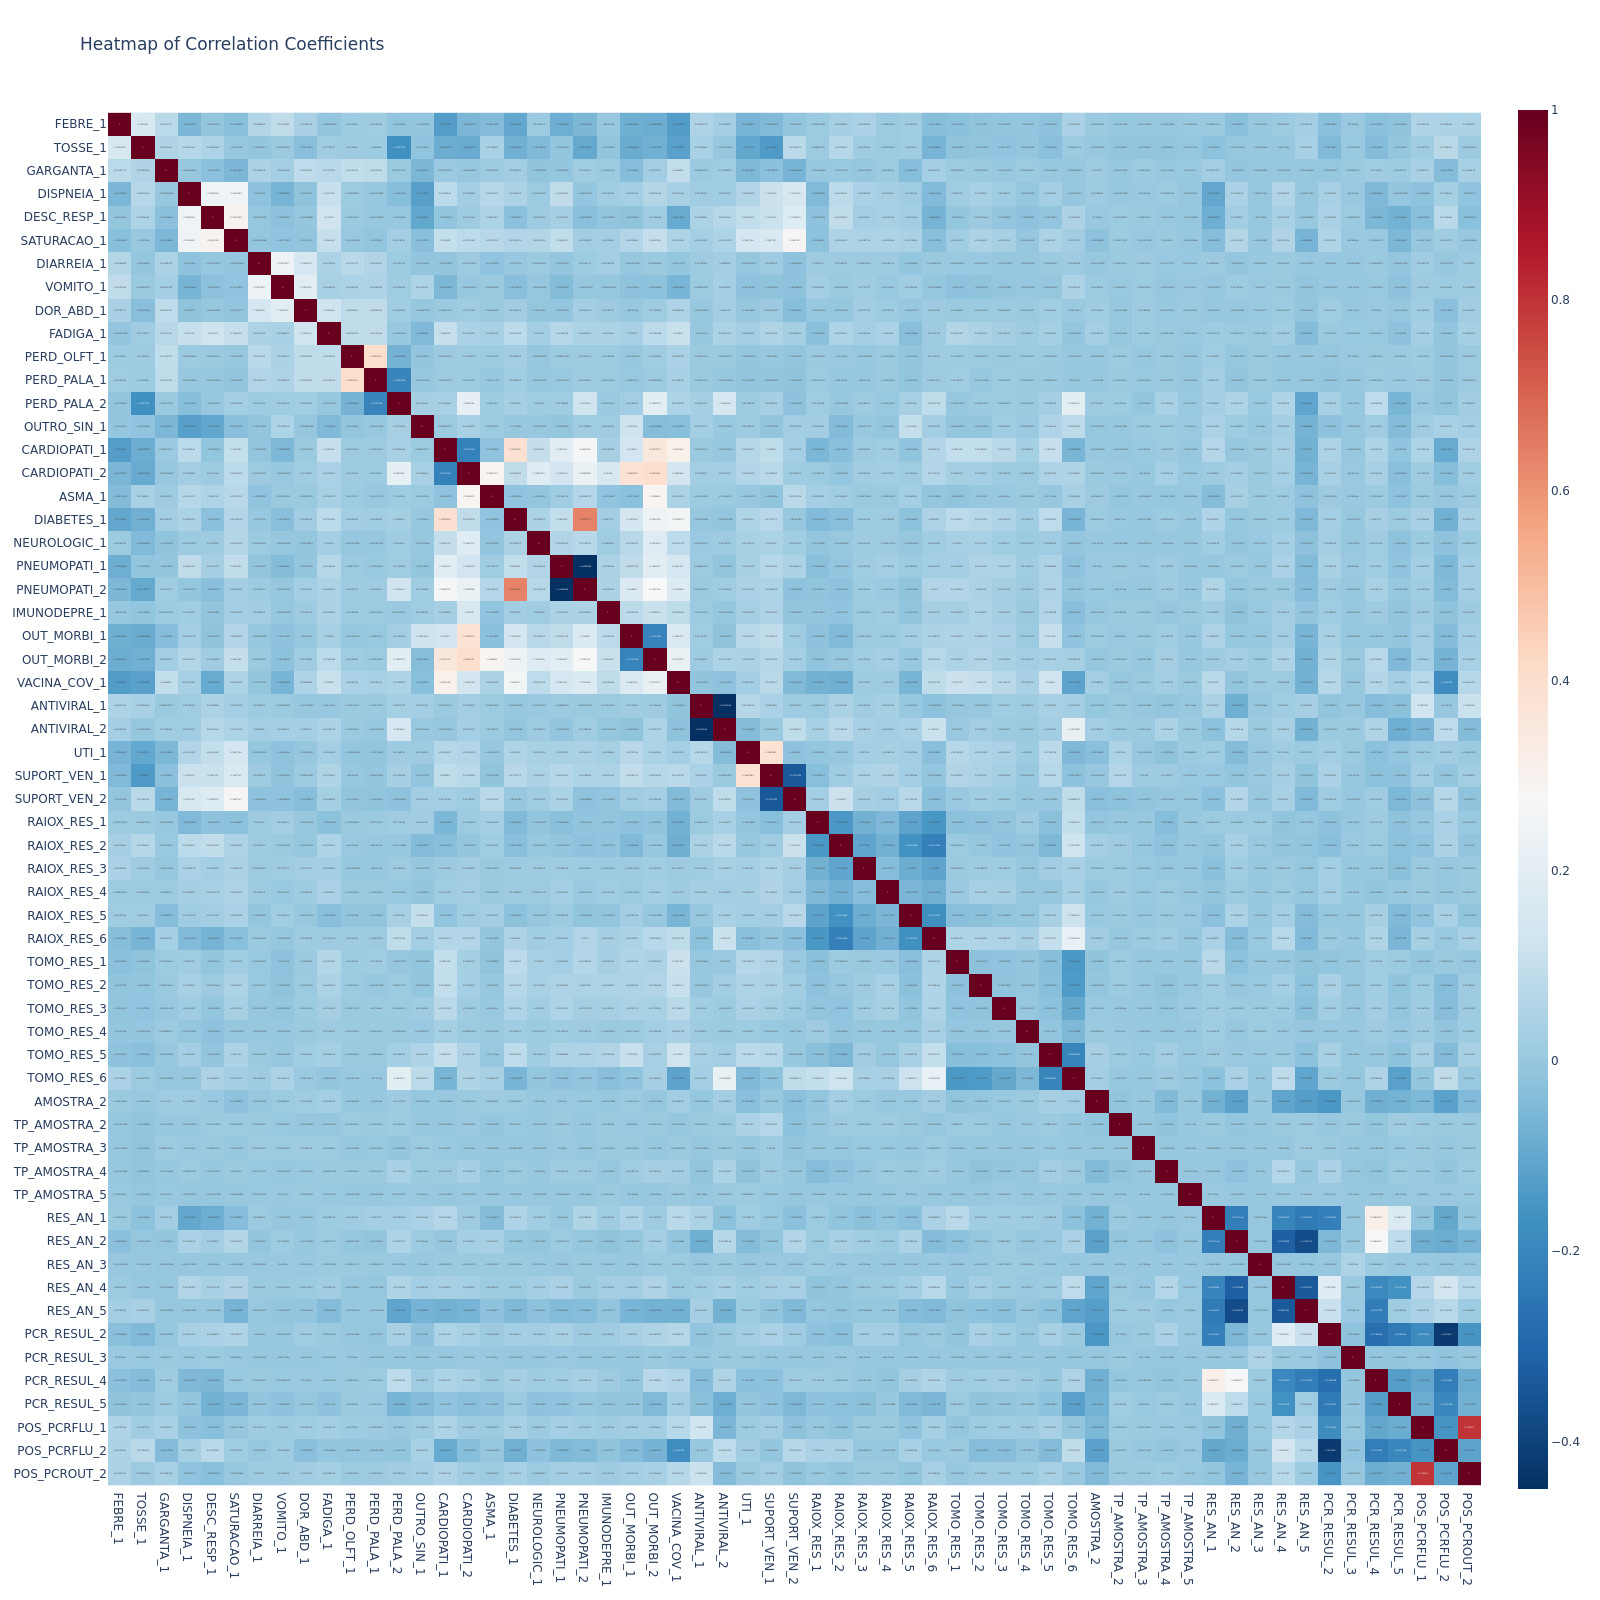

In [361]:
corr_heatmap(X_train[filtered_features], width=1600, height=1600, fig_type="png")

In [362]:
def plot_barplot_corr_with_target(X, y):
    X = X.copy()
    X[target] = y
    corr = X.corr(numeric_only=True)[target].drop(target).sort_values()
    plt.figure(figsize=(8, 12))
    sns.barplot(x=corr.values, y=corr.index, palette='RdBu_r')
    plt.title(f'Correlation Coefficients from {target}')
    plt.xlabel('Correlation Coefficients')
    plt.ylabel('Feature')
    plt.show()

/tmp/ipykernel_97779/4276116570.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




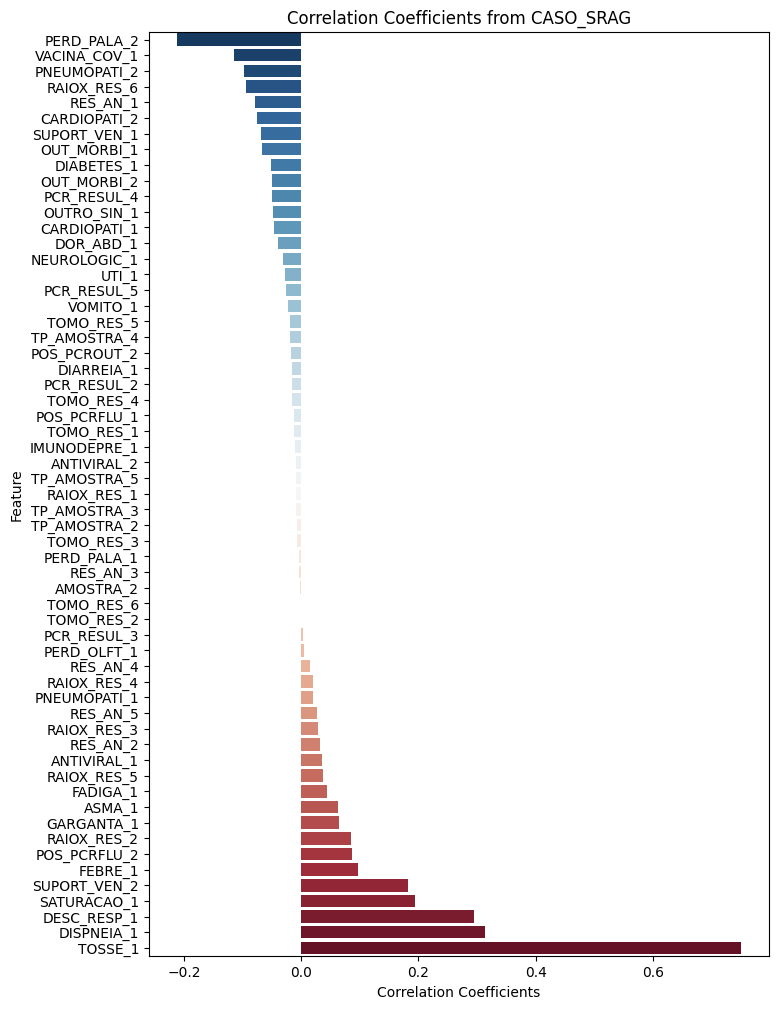

In [363]:
plot_barplot_corr_with_target(X_train[filtered_features], y_train)

# Modelling

In [364]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train[filtered_features], y_train)
model = TunedThresholdClassifierCV(
    model, scoring="matthews_corrcoef"
).fit(X_train[filtered_features], y_train)

In [365]:
matthews_corrcoef(y_test, model.predict(X_test[filtered_features]))

0.9515045377176364

In [366]:
model.best_threshold_

np.float64(0.3737273298411256)

In [367]:
def cm(clf, X, y, fig_type=None, percentage_by_class=True):
    """
    Generates an annotated heatmap of the confusion matrix for a classifier.

    Args:
        clf: Classifier object (e.g., sklearn classifier).
        X: Input features.
        y: True labels.
        alpha: Optional parameter for classifier prediction.
        fig_type: Optional figure type (e.g., 'png', 'svg').
        percentage_by_class: If True, displays percentages by class; otherwise, overall percentages.

    Returns:
        Annotated heatmap of the confusion matrix.
    """

    y_pred = clf.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    labels = np.array([["FN", "TN"], ["TP", "FP"]])
    cm = np.array([[fn, tn], [tp, fp]])

    if percentage_by_class:
        total = cm.sum(axis=0)
        percentage = cm / total * 100
    else:
        percentage = cm / np.sum(cm) * 100

    annotation_text = np.empty_like(percentage, dtype="U10")

    for i in range(percentage.shape[0]):
        for j in range(percentage.shape[1]):
            annotation_text[i, j] = f"{labels[i, j]} {percentage[i, j]:.2f}"

    fig = ff.create_annotated_heatmap(
        cm,
        x=["Positive", "Negative"],
        y=["Negative", "Positive"],
        colorscale="Blues",
        hoverinfo="z",
        annotation_text=annotation_text,
    )

    fig.update_layout(width=400, height=400, title="Confusion Matrix")
    return fig.show(fig_type)

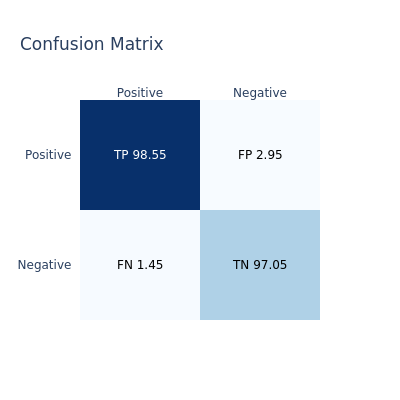

In [368]:
cm(model, X_test[filtered_features], y_test, fig_type="png")

## Análise de resíduo

In [369]:
odd_ratios = np.exp(model.estimator_.coef_)

In [370]:
results = pd.DataFrame({
    'feature': model.feature_names_in_,
    'std_coef': model.estimator_.coef_[0],
    'odd_ratio': np.exp(model.estimator_.coef_[0])
}).sort_values(by='std_coef', ascending=False).reset_index(drop=True)

In [371]:
results[results["odd_ratio"] > 1]

,feature,std_coef,odd_ratio
0,TOSSE_1,10.030877,22717.193562
1,DISPNEIA_1,3.347423,28.429370
2,DESC_RESP_1,3.128047,22.829352
3,SATURACAO_1,2.514988,12.366461
4,GARGANTA_1,1.043545,2.839265
5,SUPORT_VEN_2,0.598717,1.819782
6,POS_PCRFLU_2,0.408670,1.504816
7,UTI_1,0.402139,1.495019
8,RES_AN_2,0.388800,1.475210
9,TOMO_RES_3,0.374432,1.454165


In [372]:
"""
Aumentam a chance de SRAG:
Internação; (HOSPITAL)
Internação; (UTI)
Apresentar DISPNEIA; (DISPNEIA)
Apresentar dor na garganta; (GARGANTA)
Apresentar desconforto respiratório; (DESC_RESP)
Apresentar saturação O2 < 95%; (SATURACAO)
Apresentar fadiga; (FADIGA)
"""


'\nAumentam a chance de SRAG:\nInternação; (HOSPITAL)\nInternação; (UTI)\nApresentar DISPNEIA; (DISPNEIA)\nApresentar dor na garganta; (GARGANTA)\nApresentar desconforto respiratório; (DESC_RESP)\nApresentar saturação O2 < 95%; (SATURACAO)\nApresentar fadiga; (FADIGA)\n'

In [373]:
#Remover perda de paladar? Parece que a perda de paladar não 

In [374]:
results[results["odd_ratio"] < 1].sort_values("odd_ratio")

,feature,std_coef,odd_ratio
58,PERD_PALA_1,-1.569537,0.208141
57,PERD_PALA_2,-1.237317,0.290162
56,FADIGA_1,-0.304826,0.737252
55,PERD_OLFT_1,-0.264797,0.767362
54,OUT_MORBI_1,-0.244798,0.782862
53,VACINA_COV_1,-0.244664,0.782968
52,SUPORT_VEN_1,-0.191213,0.825956
51,RAIOX_RES_6,-0.165291,0.847647
50,ANTIVIRAL_2,-0.145261,0.864797
49,TOMO_RES_4,-0.140087,0.869283


In [375]:
"""
Diminuem a chance de SRAG:
Não apresentar tosse; (TOSSE)
Não houver desconforto respiratório; (DESC_RESP)
Não apresentar dispneia; (DISPNEIA)
"""

'\nDiminuem a chance de SRAG:\nNão apresentar tosse; (TOSSE)\nNão houver desconforto respiratório; (DESC_RESP)\nNão apresentar dispneia; (DISPNEIA)\n'

In [376]:
X = sm.add_constant(X_train[filtered_features])  # adiciona intercepto
modelo = sm.Logit(y_train.values, X_train[filtered_features]).fit()

modelo.summary()

Optimization terminated successfully.
         Current function value: 0.164234
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               166144
Model:                          Logit   Df Residuals:                   166085
Method:                           MLE   Df Model:                           58
Date:                Tue, 29 Jul 2025   Pseudo R-squ.:                  0.7072
Time:                        13:17:57   Log-Likelihood:                -27286.
converged:                       True   LL-Null:                       -93198.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
FEBRE_1         -0.3171      0.025    -12.802      0.000      -0.366      -0.269
TOSSE_1          7.3792      0.044    166.197      0.000       7.292       7.466
GARGANTA_1       1.3410      0.036     36.884      0.000       1.270       1.412
DISPNEIA_1       2.5181      0.027     92.162      0.000       2.465       2.572
DESC_RESP_1      2.2448      0.027     83.975      0.000       2.192       2.297
SATURACAO_1      1.6729      0.029     57.262      0.000       1.616       1.730
DIARREIA_1      -0.0484      0.041     -1.191      0.234      -0.128       0.031
VOMITO_1        -0.1883      0.034     -5.471      0.000      -0.256      -0.121
DOR_ABD_1       -0.1375      0.046     -2.962      0.003      -0.229      -0.047
FADIGA_1        -0.3365      0.033    -10.259      0.000      -0.401      -0.272
PERD_OLFT_1     -0.0506      0.104     -0.488      0.626      -0.254       0.153
PERD_PALA_1     -3.9475      0.111    -35.534      0.000      -4.165      -3.730
PERD_PALA_2     -3.8668      0.051    -75.943      0.000      -3.967      -3.767
OUTRO_SIN_1     -0.1100      0.025     -4.400      0.000      -0.159      -0.061
CARDIOPATI_1    -0.0851      0.056     -1.507      0.132      -0.196       0.026
CARDIOPATI_2    -0.1313      0.058     -2.282      0.023      -0.244      -0.019
ASMA_1           0.1353      0.056      2.413      0.016       0.025       0.245
DIABETES_1      -0.9911      0.075    -13.241      0.000      -1.138      -0.844
NEUROLOGIC_1    -0.1224      0.054     -2.282      0.022      -0.228      -0.017
PNEUMOPATI_1     1.2419      0.103     12.111      0.000       1.041       1.443
PNEUMOPATI_2     1.3009      0.095     13.744      0.000       1.115       1.486
IMUNODEPRE_1    -0.0073      0.070     -0.103      0.918      -0.145       0.131
OUT_MORBI_1     -0.3739      0.052     -7.247      0.000      -0.475      -0.273
OUT_MORBI_2     -0.0652      0.055     -1.181      0.238      -0.173       0.043
VACINA_COV_1    -0.6847      0.025    -27.679      0.000      -0.733      -0.636
ANTIVIRAL_1     -0.3758      0.047     -7.996      0.000      -0.468      -0.284
ANTIVIRAL_2     -0.4897      0.029    -16.775      0.000      -0.547      -0.432
UTI_1           -0.0946      0.029     -3.277      0.001      -0.151      -0.038
SUPORT_VEN_1    -0.4351      0.047     -9.177      0.000      -0.528      -0.342
SUPORT_VEN_2     0.3800      0.027     14.096      0.000       0.327       0.433
RAIOX_RES_1     -0.3609      0.043     -8.460      0.000      -0.445      -0.277
RAIOX_RES_2     -0.1902      0.038     -5.038      0.000      -0.264      -0.116
RAIOX_RES_3     -0.0867      0.057     -1.510      0.131      -0.199       0.026
RAIOX_RES_4     -0.1474      0.082     -1.789      0.074      -0.309       0.014
RAIOX_RES_5      0.0170      0.042      0.406      0.685      -0.065       0.099
RAIOX_RES_6     -0.3743      0.035    -10.675      0.000      -0.443      -0.306
TOMO_RES_1       0.3319      0.074      4.465      0.000       0.186       0.478
T

# RandomForestClassifier

In [377]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True, max_depth=int(np.ceil(np.log2(len(df_train)) - 1)), min_samples_leaf=5)
model.fit(X_train[filtered_features], y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,17
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [378]:
model.estimator.max_depth

In [379]:
model = TunedThresholdClassifierCV(
    model, scoring="matthews_corrcoef"
).fit(X_train[filtered_features], y_train)

In [380]:
matthews_corrcoef(y_test, model.predict(X_test[filtered_features]))

0.9823552719988892

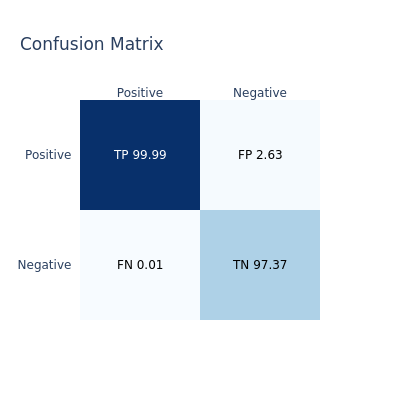

In [381]:
cm(model, X_test[filtered_features], y_test, fig_type="png")

In [382]:
results = pd.DataFrame({
    'feature': model.feature_names_in_,
    'feature_importance': model.estimator.feature_importances_,
}).sort_values(by='feature_importance', ascending=False).reset_index(drop=True)
results.head(15)

,feature,feature_importance
0,TOSSE_1,0.551488
1,DISPNEIA_1,0.129218
2,DESC_RESP_1,0.116647
3,SATURACAO_1,0.061952
4,PERD_PALA_2,0.027163
5,GARGANTA_1,0.025598
6,SUPORT_VEN_2,0.015510
7,FEBRE_1,0.007088
8,PNEUMOPATI_2,0.006294
9,VACINA_COV_1,0.005778
